In [1]:
import copy
import itertools as its
import os
import pathlib
from typing import Dict, List, Optional
from collections import defaultdict

import networkx as nx
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from aoc import sim, testing

%matplotlib inline

INPUT_PATH = pathlib.Path('..') / 'input' / 'dec08.txt'

In [2]:
WIDTH = 25
HEIGHT = 6
TOTAL = WIDTH * HEIGHT

data = list(map(int, INPUT_PATH.read_text().strip()))

In [3]:
# Make sure image is 25 x 6
assert len(data) % TOTAL == 0

In [4]:
base_array = np.array(data)
layers = np.array(base_array).reshape(-1, HEIGHT, WIDTH)

# How big is this image?
layers.shape

(100, 6, 25)

In [5]:
# Make sure I understand the numpy reshape command (I don't)
assert (layers[0, 0, :] == base_array[:WIDTH]).all()
assert (layers[0, 1, :] == base_array[WIDTH:2*WIDTH]).all()

In [6]:
min_layer = (layers == 0).sum(axis=2).sum(axis=1).argmin()
answer = (layers[min_layer, :, :] == 1).sum() * (layers[min_layer, :, :] == 2).sum()
print(f'The answer to part 1 is {answer}')

The answer to part 1 is 2520


The answer to part 2 is shown below


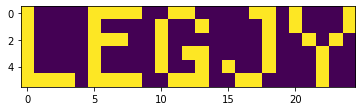

In [7]:
image = np.array([[2] * WIDTH] * HEIGHT)
for layer_idx in range(layers.shape[0]):
    layer = layers[layer_idx, :, :]
    image[image == 2] = layer[image == 2]

print('The answer to part 2 is shown below')
plt.imshow(image);